# Figura Estacional

En este notebook se realizara la representación gráfica de una serie estacional para un modelo GLM16 y CNN.

- Cargamos las librerias necesarias para la elaboracion del notebook.

In [1]:
library(loadeR)
library(magrittr)
require(transformeR)
require(downscaleR)
require(visualizeR)
require(climate4R.value)
require(downscaleR.keras)
library(ggplot2)

Loading required package: rJava

Loading required package: loadeR.java

Java version 11x amd64 by Oracle Corporation detected

NetCDF Java Library v4.6.0-SNAPSHOT (23 Apr 2015) loaded and ready

Loading required package: climate4R.UDG

climate4R.UDG version 0.2.3 (2021-07-05) is loaded


Get the latest stable version (0.2.4) using <devtools::install_github('SantanderMetGroup/climate4R.UDG')>

Please use 'citation("climate4R.UDG")' to cite this package.

loadeR version 1.7.0 (2020-09-18) is loaded


Get the latest stable version (1.7.1) using <devtools::install_github(c('SantanderMetGroup/climate4R.UDG','SantanderMetGroup/loadeR'))>

Please use 'citation("loadeR")' to cite this package.

Loading required package: transformeR




    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



transformeR version 2.1.3 (2021-08-04) is loaded


Get the latest stable version (2.1.4) using <devtools::install_github('SantanderMetGroup/transformeR')>

Please see 'citation("transformeR")' to cite this package.

Loading required package: downscaleR

downscaleR version 3.3.3 (2021-07-05) is loaded

Please use 'citation("downscaleR")' to cite this package.

Loading required package: visualizeR

Warning message:
“no DISPLAY variable so Tk is not available”
visualizeR version 1.6.1 (2021-03-11) is loaded

Please see 'citation("visualizeR")' to cite this package.

Loading required package: climate4R.value

Loading required package: VALUE

---------------------------------------------- 
| VALUE version 2.2.2 (2021-08-18) is loaded |
|         http://www.value-cost.eu           |
----------------------------------------------

Loading required package: downscaleR.keras

Loading required package: keras

Loading required package: tensorflow



- Cargamos las variables independientes y dependiente.

In [2]:
y <- load('../Data/y_sam.rda') %>% get()
x <- load('../Data/x_SAM.rda') %>% get()

- Cargamos los modelos.

In [3]:
glm1 <- load('../GLM_1.rda') %>% get()
glm4 <- load('../GLM_4.rda') %>% get()
glm16 <- load('../GLM_16.rda') %>% get()
nnss <- load('../nn-ss1.rda') %>% get()
nnss4 <- load('../nn-ss4.rda') %>% get()
nnss16 <- load('../nn-ss16.rda') %>% get()
cnnss <- load('../cnn-ss.rda') %>% get()
analogos <- load('../Analogos.rda') %>% get()

- Cargamos el archivo con las regiones.

In [5]:
regiones <- read.csv('../regiones_VALUE_SAM.csv')

- Agrupamos los modelos y las observaciones mensualmente.

In [6]:
aggr.pars <- list(FUN = "mean", na.rm=TRUE)

In [7]:
obs_m <- aggregateGrid(y, aggr.m= aggr.pars)
Glm1_m <- aggregateGrid(glm1, aggr.m= aggr.pars)
Glm4_m <- aggregateGrid(glm4, aggr.m= aggr.pars)
Glm16_m <- aggregateGrid(glm16, aggr.m= aggr.pars)
Nnss_m <- aggregateGrid(nnss, aggr.m= aggr.pars)
Nnss4_m <- aggregateGrid(nnss4, aggr.m= aggr.pars)
Nnss16_m <- aggregateGrid(nnss16, aggr.m= aggr.pars)
Cnnss_m <- aggregateGrid(cnnss, aggr.m= aggr.pars)
Analogos_m <- aggregateGrid(analogos, aggr.m= aggr.pars)

[2022-09-16 10:15:39] Performing monthly aggregation...

[2022-09-16 10:15:40] Done.

[2022-09-16 10:15:40] Performing monthly aggregation...

[2022-09-16 10:15:40] Done.

[2022-09-16 10:15:40] Performing monthly aggregation...

[2022-09-16 10:15:41] Done.

[2022-09-16 10:15:41] Performing monthly aggregation...

[2022-09-16 10:15:41] Done.

[2022-09-16 10:15:41] Performing monthly aggregation...

[2022-09-16 10:15:41] Done.

[2022-09-16 10:15:42] Performing monthly aggregation...

[2022-09-16 10:15:42] Done.

[2022-09-16 10:15:42] Performing monthly aggregation...

[2022-09-16 10:15:42] Done.

[2022-09-16 10:15:42] Performing monthly aggregation...

[2022-09-16 10:15:43] Done.

[2022-09-16 10:15:43] Performing monthly aggregation...

[2022-09-16 10:15:43] Done.



- Iteramos un bucle que nos represente la serie estacional para las observaciones y los modelos seleccionados(GLM16 y CNN).
- Ademas se incluiran zonas sombreadas que representaran media desviación tipica hacia arriba y abajo.

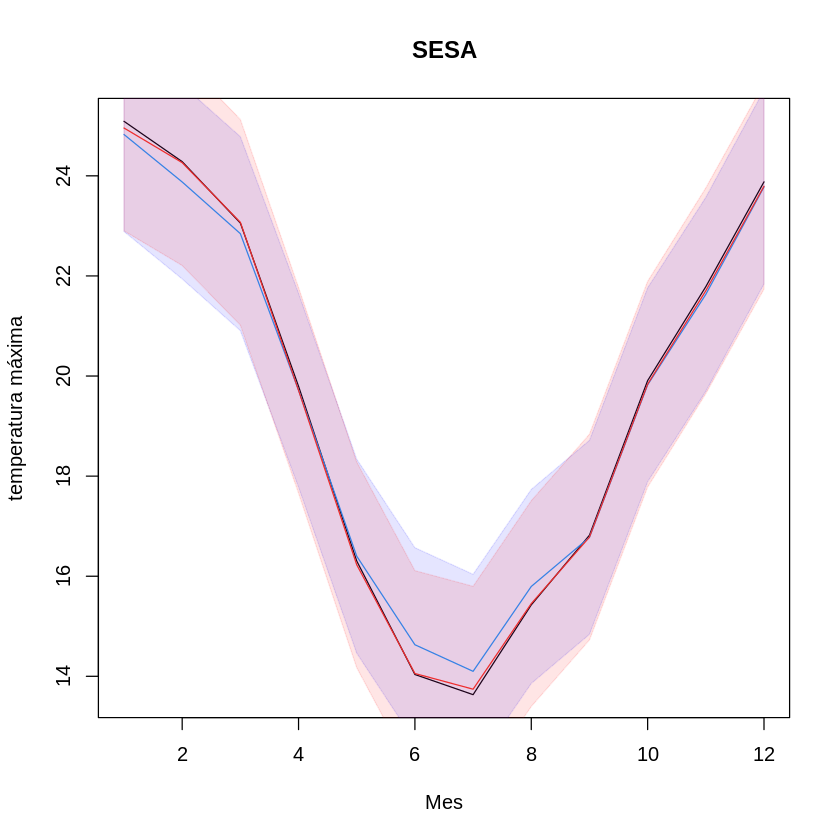

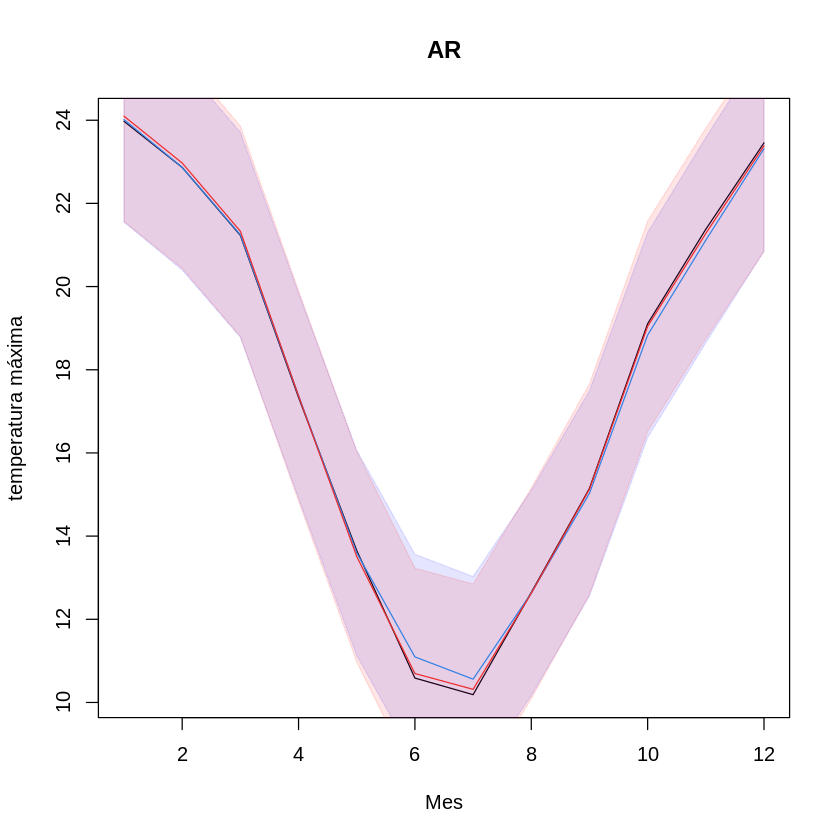

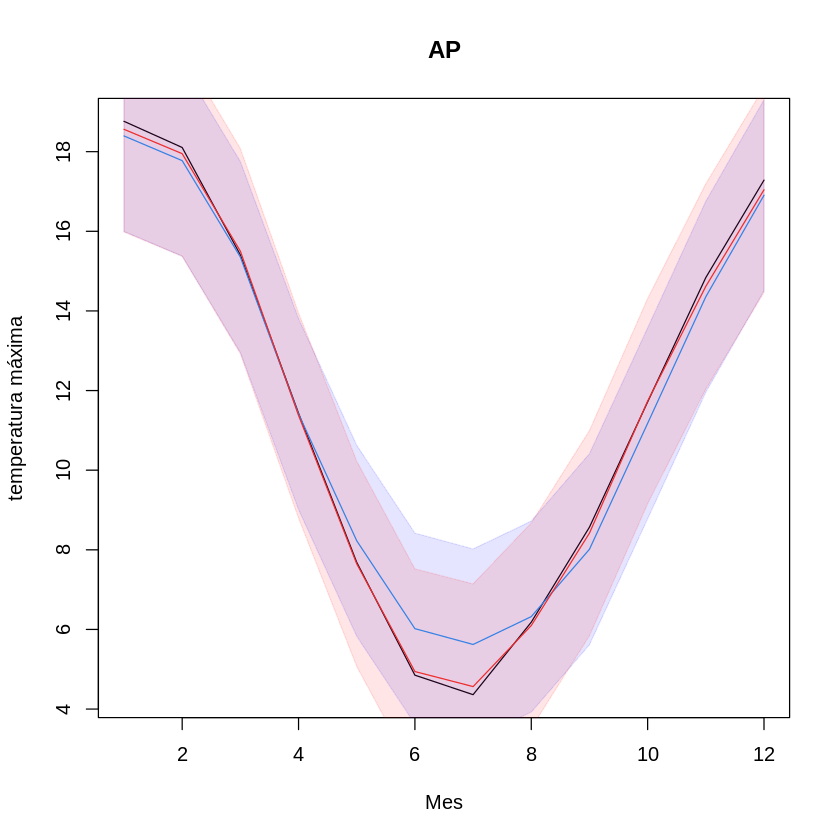

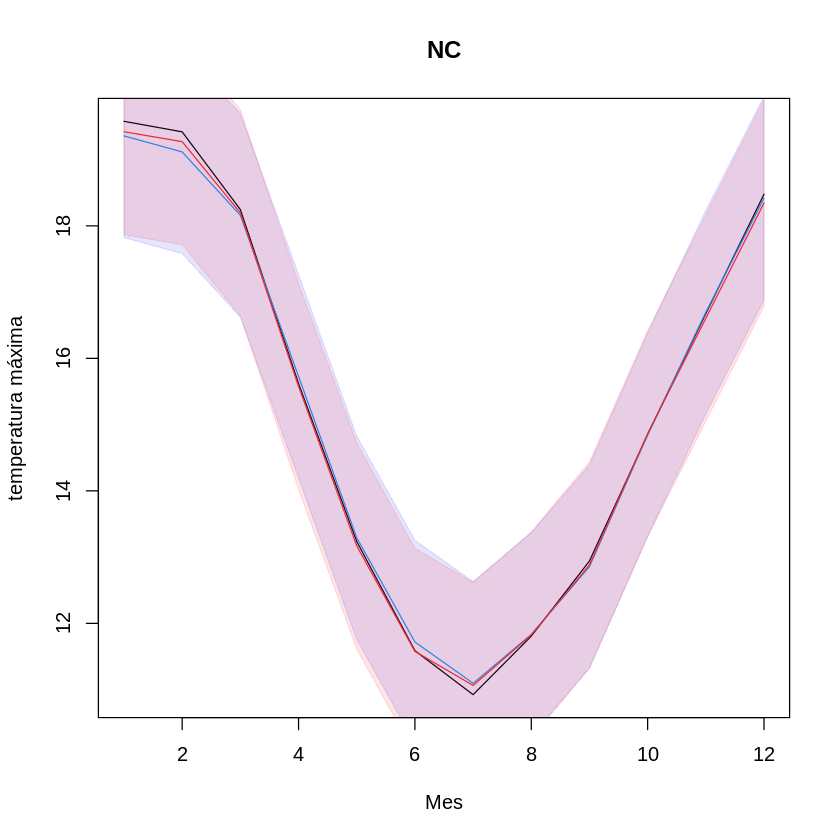

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

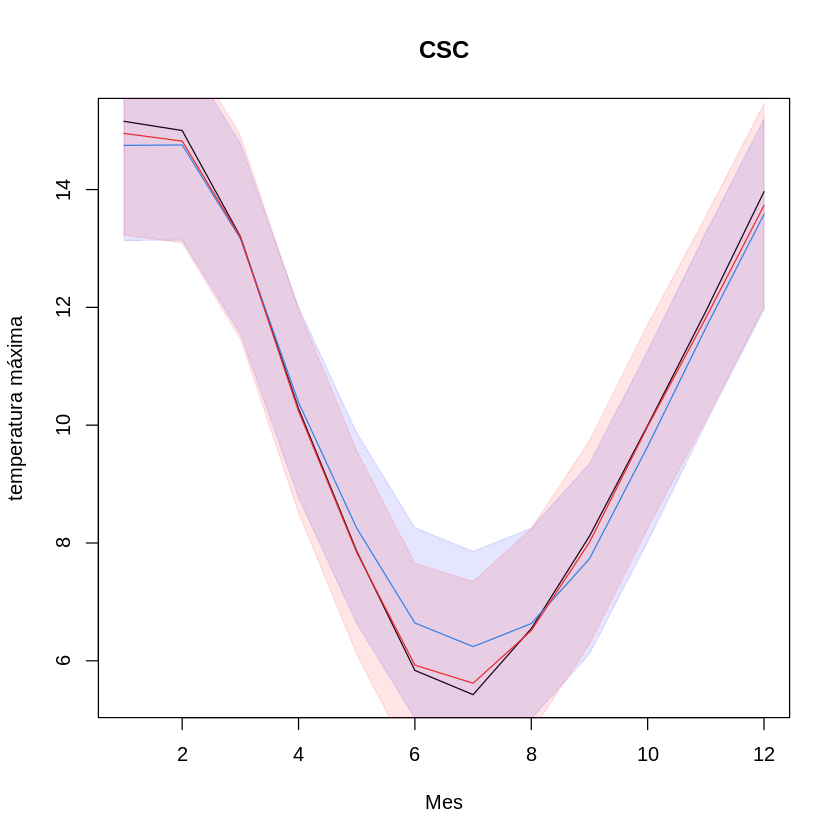

In [8]:
#pdf('Plot_Estacional.pdf',width = 4,height = 4)
mes <- c (1:12)
lapply(c('SESA','AR','AP','NC','CSC'), FUN = function(reg){
        
    Regiones <- matrix(,12,9)
    
    for(i in 1:length(mes)){
    
       
        region <- subset(regiones, regiones$Region == reg)
        OBS <- subsetGrid(obs_m, station.id = region[,1], season = i)
        Regiones[i,1] <- mean(rowMeans(OBS$Data,na.rm=TRUE))
        GLM1 <- subsetGrid(Glm1_m, station.id = region[,1], season = i)
        Regiones[i,2] <- mean(rowMeans(GLM1$Data,na.rm=TRUE))
        GLM4 <- subsetGrid(Glm4_m, station.id = region[,1], season = i)
        Regiones[i,3] <- mean(rowMeans(GLM4$Data,na.rm=TRUE))
        GLM16 <- subsetGrid(Glm16_m, station.id = region[,1], season = i)
        Regiones[i,4] <- mean(rowMeans(GLM16$Data,na.rm=TRUE))
        NN <- subsetGrid(Nnss_m, station.id = region[,1], season = i)
        Regiones[i,5] <- mean(rowMeans(NN$Data,na.rm=TRUE))
        NN4 <- subsetGrid(Nnss4_m, station.id = region[,1], season = i)
        Regiones[i,6] <- mean(rowMeans(NN4$Data,na.rm=TRUE))
        NN16 <- subsetGrid(Nnss16_m, station.id = region[,1], season = i)
        Regiones[i,7] <- mean(rowMeans(NN16$Data,na.rm=TRUE))
        CNN <- subsetGrid(Cnnss_m, station.id = region[,1], season = i)
        Regiones[i,8] <- mean(rowMeans(CNN$Data,na.rm=TRUE))
        ANALOGOS <- subsetGrid(Analogos_m, station.id = region[,1], season = i)
        Regiones[i,9] <- mean(rowMeans(ANALOGOS$Data,na.rm=TRUE))
             
    }
    
    plot(mes,Regiones[,1],type='l',xlab = "Mes",main = reg,
                                ylab = "temperatura máxima", col= '#030303')

    #Dibujo de GLM16(Azul)
    col3 <- rgb(0, 0, 1, alpha = 0.1) 
    polygon(c(mes, rev(mes)),
            c(Regiones[,4] -0.5*sd(Regiones[,4]),
              rev(Regiones[,4] +0.5*sd(Regiones[,4]))), col = col3,border=col3)
    lines(mes,Regiones[,4], col = '#1E90FF')
    
    #Dibujo de CNN(Rojo)
    col2 <- rgb(1, 0, 0, alpha = 0.1) 
    polygon(c(mes, rev(mes)),
            c(Regiones[,8] -0.5*sd(Regiones[,8]),
              rev(Regiones[,8] +0.5*sd(Regiones[,8]))), col = col2,border=col2)
    lines(mes,Regiones[,8], col = '#EE2C2C')
})
 
#dev.off()